---
layout: post
title:  "A Natural Language Processing project recipe"
date:   2023-04-07 10:14:54 +0700
categories: MachineLearning
---

# Introduction

Natural Language Processing (NLP) is a branch of machine learning that analyze to understand and able to generate human language, aiding decision making. NLP has a wide range of applications, including chatbots, sentiment analysis, machine translation and speech recognition. 

- Sentiment analysis invovles analyzing the emotional aspect of a piece of text. It is to determine whether it is positive, negative or neutral (whether people like or dislike the product)

- Named Entity Recognition: this involves identifying and classifying named entities in a sentence. For example, a particular word can be a person, organization, date, or location.

- Part of speech tagging: this is to tag each word in a sentence with its part of speech. We need this to understand the meaning of the whole sentence.

- Text classification has tasks such as classifying an email as spam or not.

- Machine translation: assisting language translation with suggestion automatically.

- Chatbot: converse with users on narrow topics


# Text preprocessing

Some usual preprocessing such as lowercase all the words, remove punctuations.

## Stemming
Stemming is when we truncate the words to their stem. For example: going and go and gone all have the stem 'go'.

## Tokenization
In general, the prepocessing of an NLP task involves breaking down text into individual tokens. Tokens are root syllables that make up that word. The process of breaking down text into tokens is called tokenization. After tokenization, we convert tokens into numbers, also called vectorized. Since a word can be represented as a vector of multiple values - each value is a dimension of that word in the latent space.

Sometimes the words co-occur in n-grams. For example 'the United States' can be treated as an n-gram of length three.

## One hot encoding

We collect a corpus of unique words from document (mixing them altogether). Then we start to encode the interested sentence into a sparse matrix of 0 and 1, with each row to be one word in the corpus, and each column to be one word in the sentence. In each row, we use number 1 to represent the appearance of the word in the sentence, other words to be 0. For example:

The fox jumps over the cat.

The: 1 0 0 0 1 0

fox: 0 1 0 0 0 0

jump: 0 0 1 0 0 0

..

Value of 1 indicate the presence of a word (row) at a particular position (column) in the sentence. 

## Word vector

While one hot encoding captures word location only, word vector (word embedding) captures both meaning and location. With a reprensented vector in the latent space, NLP models can also learn linguistic features automatically. Since these embeddings capture semantic and syntactic relationships between words they can be used as input features for natural language processing (NLP) models.

The overarching concept is a word space (latent space) that assigns meaning to each location. Initially, each word has a random location within the space. Then we consider the frequency in which two words show up together in a big corpus, that would adjust those word locations gradually, hence the words can pick up and shift their meaning. For example, for each word, we consider three words before and three words after to be its context. Apart from similarity in meaning, we can also do simple algebra on this space (King - Man + Woman = Queen), this means that word representation space is a multi cluster distribution. In other words, we don't just find similar words together, on a global scale, the space also forms clusters of words as its inherent structure. Note that the inherent structure can display bias learnt from the natural language, for example, man is to coder as woman is to homemaker.

### word2vec

In the paper "Efficient Estimation of Word Representations in Vector Space", 2013, the authors use a proposed techniques for measuring the quality of the resulting word vector, with the assumption that not only will similar words tend to be close, but words can have multiple degrees of similarity. For example, nouns can have multiple endings, and if we search for similar words in a subspace of the original vector space, we can find words with similar endings. And the similarity goes beyond simple syntactic regularities. We can perform simple algebraic operations on the vector space as well. For example: King - Man + Woman = Queen. This is surprising since the inherent structure of the vector space allows this, and words learn their position in the space after computation about them and their context are carried on.

The authors want to maximize this kind of accuracy in vector operations and optimize the computation. Apart from the usual feed forward and the recurrent neural net, they  propose a new log linear neural network architectures for Word2Vec. We would look into those models respectively. A probabilistic feedforward neural net for language model has input, project, hidden and output layers. At input, N previous words are encoded using 1-of-V coding, with V being the size of the vocabulary. The input layer is then projected onto a projection layer P that has dimensionality N x D, using a shared project matrix. The architecture becomes complex between projection and hidden layer. The output layer is all the words in the vocabulary, since it has V dimensionality. Hence the complexity mostly resides in hidden and output layers. To reduce this, the authors use hierarchical softmax and vocabulary is represented as a Huffman binary tree (with frequent words assigned short binary codes) reducing the output.

A recurrent neural net theoretically can represent more complex data patterns than a shallow net.  It doesn't have projection layer, and it has recurrent matrix that connects hidden layers. This forms some sort of short term memory since it stores and update the hidden layer in each time step. Using hierarchical softmax can reduce some complexity in hidden to output layer.

For their contribution, they propose two new architectures that train model in two steps: first, learn the word vectors, then train n-gram model on top of those. They also train parallelly on CPU of different machines to investigate different models. The framework is named DistBelief, with mini batch gradient descent and adaptive learning rate of Adagrad.

The first architecture (a log linear one) is similar to the feedforward, where they remove the nonlinear hidden layer, and average the word vectors (projected them into the same position). This is called a bag of word (BOW) model since they don't take into account the order of words. During calculation, they count 4 words in the past and 4 words in the future of the current word. Continuous BOW predicts the word based on those context words.

The Continuous Skip-Gram model predicts context words given a target word. Specifically, the current word is inputted into a log linear classifier with continuous project layer and predict the word before and after it.

<img width="718" alt="Screen Shot 2023-04-07 at 16 54 47" src="https://user-images.githubusercontent.com/7457301/230588558-3a9399e5-4f31-4c43-8966-54da221deb8f.png">

They train on Google News corpus (6B tokens) and vocabulary size is restricted at 1 million most frequent words at 640 dimension (a vector of 640 to represent each word). To avoid curse of dimensionality (adding dimension or data diminishes the performance at some point), they increase both dimensions and data points at the same time.

The after trained space can do simple algebra. For example, X = vector('biggest') - vector('big') + vector('small'). If we search in the vector space for words that cosine similar (Euclidean distance) to X, we might find 'smallest'. This kind of training on high dimensional word vectors can answer other semantic relationships too. For example, France to Paris is as Germany to Berlin. A word space with such inherent relationship can be very useful for other down the line machine learning tasks.

Their architectures perform well, better than the RNN and feedforward network, even in the Microsoft Sentence Completion Challenge.

### GloVe

GloVe (Global Vectors for Word Representation) is a word embedding method that came out in 2014. It is designed to learn word representations that capture the meaning of words in a more global context. It is a new global log bilinear regression model that combines the advantages of the two major model families: global matrix factorization and local context window methods. It results in a vector space with meaningful substructure, scoring high on word analogy task and named entity recognition task.

How did they do that? They argue that global log bilinear regression can produce linear direction of meaning (the simple algebra part). And then they propose a weighted least squares to train on global word-word co-occurence counts, this is to make use of global statistics of word occurence.

First we count the co-occurence of word-word matrix X, $$ X_{ij}$$ be the number of times word j occurs in the context of word i. $$ X_i = \sum_k X_{ik} $$ be the number of times word appears in the context of word i. $$ P_{ji} = P(j\mid i) = \frac{X_{ij}}{X_i} $$ be the probability of word j appearing in the context of word i. Now meaning can be implied from co-occurance probability. Take i = ice and j = steam, in thermodynamic phase context. We can study the relationship of these words by the ratio of their co-occurence probabilities using prob words k.  For k = solid, that is related to ice but not steam, the ratio $$ \frac{P_{ik}}{P_{jk}} $$ will be large. For k = gas that is related to steam but not ice, the ratio is small. For k = water that is not related, the ratio is close to 1. The author also proposed a weighted least squares regression to address the drawback that the model weighs all co-occurrences equally, even the ones that never happen or rarely happen.

They train the model on corpora of Wikipedia (6B tokens) and CommonCrawl (42B tokens). They achieve superior resutls due to some factors: the choice to use negative sampling (which works better than the hierarchical softmax), the number of negative samples, and the choice of the corpus.


<img width="712" alt="Screen Shot 2023-04-07 at 18 54 48" src="https://user-images.githubusercontent.com/7457301/230604671-8d016cd5-0a58-4bf1-8445-4aca26d2b153.png">


## Term frequency - inverse document frequency TFIDF

TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic that is commonly used to evaluate the importance of words in a document or corpus.

The basic idea behind TF-IDF is that words that occur frequently in a document, but rarely in other documents, are more important and informative for that document's content. Conversely, words that occur frequently in all documents (such as the, and) are less important and may be considered stopwords.

TF-IDF is calculated by multiplying two values: term frequency (TF) and inverse document frequency (IDF). The term frequency is simply the number of times a word appears in a document f(w) divided by the total word of that document f(d), while the inverse document frequency is log of total number of documents in the corpus $$ \mid D \mid $$ divided by the number of documents in which the term appears. For the TF, sometimes they use log scaled frequency, sometimes only the raw count. For the IDF, sometimes they add 1 into the nominator, denominator and the term, to avoid divided by zero error.

$$ tfidf = \frac{f(w)}{f(d)} . log \frac{\mid D \mid}{\{\mid d \in D: w \in d \}\mid} $$

After having the TF-IDF we can measure word similarity by cosine similarity (the vector version of the Euclidean distance). Or after having the rank of word importance, we can retrieve documents based on those search term. Another application is after having the most important words, we summarize the document accordingly.

# Code example
In this example we will examine Word2Vec method. After preprocess the tokens, we input them into the model and then do a simple algebraic operation: husband + woman - man = wife

In [2]:
import nltk
from nltk import word_tokenize, sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem.porter import * 
nltk.download('gutenberg') 
nltk.download('punkt') 
nltk.download('stopwords')
import string
import gensim
from gensim.models.phrases import Phraser, Phrases 
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook, output_file 
from bokeh.plotting import show, figure 
%matplotlib inline

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/nguyenlinhchi/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nguyenlinhchi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nguyenlinhchi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from nltk.corpus import gutenberg

In [4]:
# Tokenize into sentences
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [5]:
gberg_sent_tokens[0]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'

In [6]:
# Example to tokenize into words
word_tokenize(gberg_sent_tokens[1])


['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [12]:
# Tokenize into sentence and then words
gberg_sents = gutenberg.sents()
gberg_sents[0:2]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I']]

In [13]:
# example to lowercase, remove stop words (the, and, etc) and punctuation
stpwrds = stopwords.words('english') + list(string.punctuation)
[w.lower() for w in gberg_sents[4] if w.lower() not in stpwrds]

['youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

In [15]:
# example to stem
stemmer = PorterStemmer()

In [16]:
[stemmer.stem(w.lower()) for w in gberg_sents[4] if w.lower() not in stpwrds]

['youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

In [17]:
# example to do N-grams (for example New-York)
phrases = Phrases(gberg_sents)
bigram = Phraser(phrases)
bigram.phrasegrams

{'two_daughters': 11.966987886528118,
 'her_sister': 17.796341912611076,
 "'_s": 31.066694850762417,
 'very_early': 11.01230173457644,
 'Her_mother': 13.529621959045564,
 'long_ago': 63.22435639270114,
 'more_than': 29.024006819814797,
 'had_been': 22.306349272800997,
 'an_excellent': 39.064443355850045,
 'Miss_Taylor': 453.76578390553544,
 'very_fond': 24.134631699685762,
 'passed_away': 12.350716162995981,
 'too_much': 31.376458650431253,
 'did_not': 11.72858690304441,
 'any_means': 14.097169263925728,
 'wedding_-': 17.469774011299435,
 'Her_father': 13.129762639674155,
 'after_dinner': 21.528861425991604,
 'self_-': 47.79087603091109,
 'sixteen_years': 107.04772502472798,
 'five_years': 40.129339674923365,
 'years_old': 54.73622181125361,
 'seven_years': 52.59487691468612,
 'each_other': 79.41799630087341,
 'a_mile': 12.783277635060301,
 'must_be': 10.230138529643797,
 'difference_between': 220.52858240070222,
 'could_not': 10.871141494497287,
 'having_been': 11.538186246573856,
 'm

In [20]:
# PREPROCESS THE CORPUS
## remove punctuation
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w.lower() 
                        not in list(string.punctuation)])


In [22]:
# handle bigram
lower_bigram = Phraser(Phrases(lower_sents,
                               min_count=32, threshold=64))
lower_bigram

In [23]:
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])


In [47]:
clean_sents[6]

['sixteen',
 'years',
 'had',
 'miss_taylor',
 'been',
 'in',
 'mr_woodhouse',
 's',
 'family',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 'very',
 'fond',
 'of',
 'both',
 'daughters',
 'but',
 'particularly',
 'of',
 'emma']

In [49]:
# remove stopword
preprocessed = []
for w in clean_sents:
    preprocessed.append([stemmer.stem(w.lower()) for w in w if w.lower() not in stpwrds])
preprocessed[6]

['sixteen',
 'year',
 'miss_taylor',
 'mr_woodhous',
 'famili',
 'less',
 'gover',
 'friend',
 'fond',
 'daughter',
 'particularli',
 'emma']

In [51]:
# input into model
model = Word2Vec(sentences=preprocessed, 
                 sg=1, window=10, min_count=10, workers=4)

In [52]:
# result
model.wv.key_to_index

{'shall': 0,
 'said': 1,
 'unto': 2,
 'lord': 3,
 'one': 4,
 '."': 5,
 'god': 6,
 'man': 7,
 'thi': 8,
 '--': 9,
 'thou': 10,
 'ye': 11,
 'thee': 12,
 ',"': 13,
 'say': 14,
 'day': 15,
 'upon': 16,
 'come': 17,
 'would': 18,
 'thing': 19,
 'son': 20,
 'like': 21,
 'go': 22,
 'could': 23,
 'king': 24,
 'hand': 25,
 'know': 26,
 'came': 27,
 'see': 28,
 'time': 29,
 'hous': 30,
 'look': 31,
 'good': 32,
 'even': 33,
 'littl': 34,
 'everi': 35,
 '1': 36,
 'peopl': 37,
 '2': 38,
 'us': 39,
 'make': 40,
 'made': 41,
 'men': 42,
 'great': 43,
 'let': 44,
 'father': 45,
 '3': 46,
 'israel': 47,
 'may': 48,
 'hath': 49,
 'well': 50,
 '4': 51,
 'two': 52,
 '7': 53,
 'word': 54,
 'must': 55,
 '5': 56,
 '6': 57,
 '?"': 58,
 'much': 59,
 'went': 60,
 'land': 61,
 'children': 62,
 'way': 63,
 'yet': 64,
 '9': 65,
 '8': 66,
 'also': 67,
 '10': 68,
 'give': 69,
 '11': 70,
 'think': 71,
 'take': 72,
 'old': 73,
 'mr': 74,
 'away': 75,
 'eye': 76,
 'call': 77,
 '12': 78,
 'might': 79,
 'place': 80,
 'f

In [53]:
# we have 7745 words in the vocabulary
len(model.wv.key_to_index)

7745

In [35]:
# let's see the vector representation of the word men
model.wv['men']

array([-0.18468249,  0.06325892,  0.01308708,  0.18653318, -0.19613682,
       -0.40422338,  0.2299384 ,  0.25596562,  0.10555264, -0.30124772,
        0.37354293, -0.25737157,  0.21009737,  0.13068293,  0.25980756,
        0.25370252, -0.22621223, -0.16719353, -0.13919002, -0.29158577,
        0.24395864, -0.3127991 , -0.04485767, -0.44950372, -0.4746415 ,
        0.31596923, -0.09829171, -0.2788213 ,  0.23204322, -0.07246452,
        0.22872812, -0.15918386, -0.24236207, -0.1425959 ,  0.21417455,
        0.6150764 , -0.04175409, -0.477133  , -0.03276837, -0.29636404,
        0.07169929, -0.3279534 ,  0.16641249, -0.30916795,  0.6396977 ,
       -0.0885635 , -0.05042264,  0.20307241, -0.47921538,  0.0342183 ,
       -0.0859681 ,  0.43662393, -0.11143676,  0.07161714, -0.00264144,
        0.05555701, -0.10695332, -0.25567538, -0.10583918, -0.0602743 ,
        0.37836388, -0.16090545,  0.1339406 ,  0.04201669, -0.4194944 ,
        0.32112533,  0.16019395,  0.3029806 , -0.18761338,  0.05

In [54]:
# most similar to men
model.wv.most_similar('men',topn=3)

[('gong', 0.5398657917976379),
 ('valiant', 0.5377486944198608),
 ('barbarian', 0.5352712273597717)]

In [55]:
# similarity between men and women
model.wv.similarity('men','women')

0.4954386

In [56]:
# simple algebra: men + woman - man = women
model.wv.most_similar(positive=['men','woman'], negative=['man'])

[('women', 0.6154292821884155),
 ('virgin', 0.4893409013748169),
 ('concubin', 0.4869789183139801),
 ('wive', 0.48526743054389954),
 ('nabal', 0.4788726568222046),
 ('harlot', 0.47875019907951355),
 ('offspr', 0.4723259210586548),
 ('sarah', 0.4715254604816437),
 ('childless', 0.46972396969795227),
 ('parent', 0.4664917588233948)]

In [58]:
# husband + woman - man = wife
model.wv.most_similar(positive=['husband','woman'], negative=['man'])

[('wife', 0.6940380930900574),
 ('sister', 0.6235106587409973),
 ('wive', 0.5963566899299622),
 ('younger', 0.5844662189483643),
 ('wean', 0.5826187133789062),
 ('womb', 0.5700362920761108),
 ('amnon', 0.5695263743400574),
 ('chast', 0.5670580863952637),
 ('daughter', 0.5650200247764587),
 ('begotten', 0.5636038780212402)]

In [59]:
# plot the vocabulary
tsne = TSNE(n_components=2, n_iter=1000)
X_2d = tsne.fit_transform(model.wv[model.wv.key_to_index])
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
    
coords_df['token'] = model.wv.key_to_index.keys()

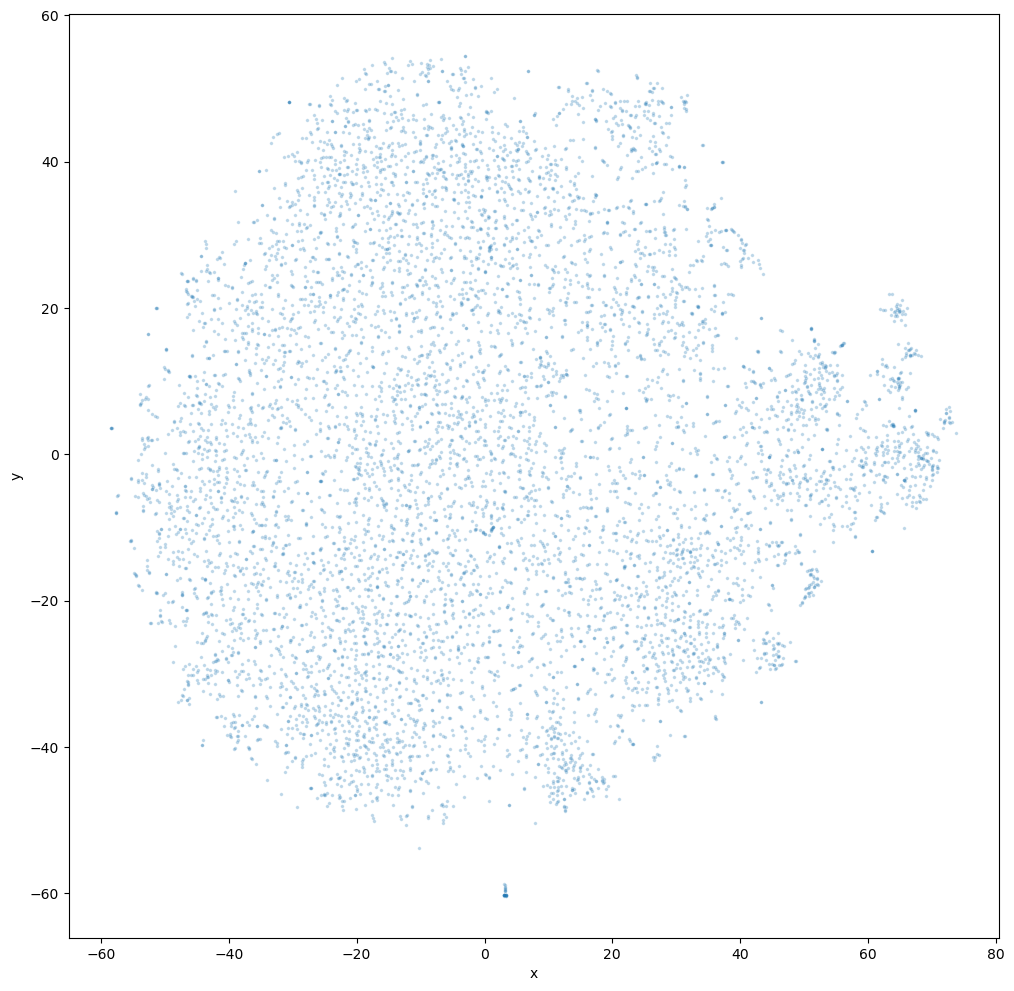

In [60]:
_ = coords_df.plot.scatter('x','y', figsize=(12,12),
                           marker='.', s=10, alpha=0.2)


In [61]:
output_notebook()
subset_df = coords_df.sample(n=5000)
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)
show(p)

Loading BokehJS ...